<a href="https://colab.research.google.com/github/abalckpie/professorahn/blob/main/AIandCarbon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 구글 드라이브 연결

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


2. 데이터 불러오기

In [ ]:
from google.colab import files
import pandas as pd
data = pd.read_csv('/content/gdrive/MyDrive/aiandcarbon/2023 글로벌ai인덱스 국가 이산화탄소 배출량.csv', encoding='euc-kr')
data.head()
data.tail()

,Entity,Carbon_Emissions,global_AI_index
57,United Kingdom,305146340,41.8
58,United States,4911391000,100.0
59,Uruguay,7865945,16.3
60,Vietnam,334726080,18.0
61,Poland,289281540,24.8


3. 결측값 확인

In [ ]:
data.isnull().sum()

,0
Entity,0
Carbon_Emissions,0
global_AI_index,0


3-1. 결측값 없음 확인

4. 데이터 분포 확인(히스토그램, 산점도)

(array([58.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([1.82223000e+06, 1.19189031e+09, 2.38195838e+09, 3.57202646e+09,
        4.76209454e+09, 5.95216262e+09, 7.14223069e+09, 8.33229877e+09,
        9.52236685e+09, 1.07124349e+10, 1.19025030e+10]),
 <BarContainer object of 10 artists>)

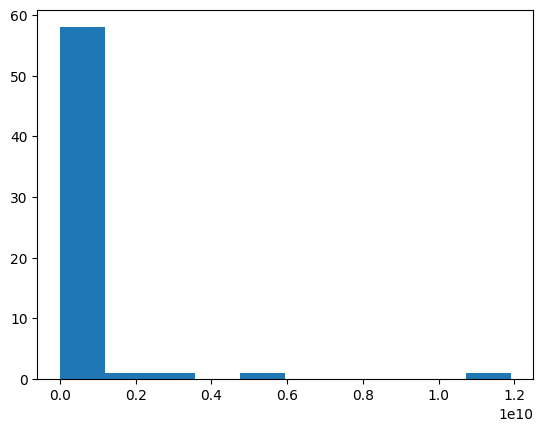

In [ ]:
#라이브러리 설치
import matplotlib.pyplot as plt
#Carbon_Emissions 히스토그램 출력
plt.hist(data['Carbon_Emissions'])

(array([13., 28., 12.,  6.,  1.,  1.,  0.,  0.,  0.,  1.]),
 array([  8.3 ,  17.47,  26.64,  35.81,  44.98,  54.15,  63.32,  72.49,
         81.66,  90.83, 100.  ]),
 <BarContainer object of 10 artists>)

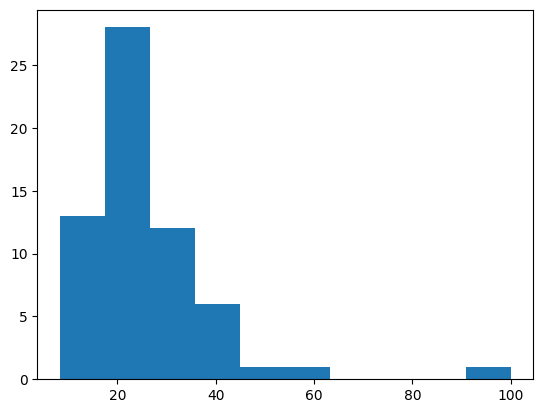

In [ ]:
#global_AI_index 히스토그램 출력
plt.hist(data['global_AI_index'])

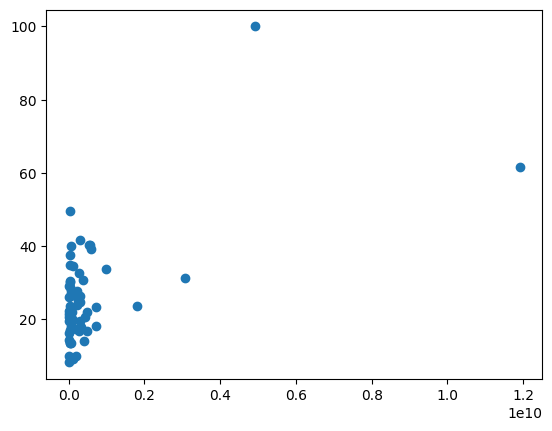

In [ ]:
#Carbon_Emissions와 global_AI_index 산점도 출력
plt.scatter(data['Carbon_Emissions'], data['global_AI_index'])
plt.show()

3-1. 정규분포 확인

📌 global_AI_index의 정규성 검정 결과
Shapiro-Wilk Test: W=0.7705, p-value=0.0000
Kolmogorov-Smirnov Test: D=0.1442, p-value=0.1375
Anderson-Darling Test: A2=2.7038, Critical Values=[0.544 0.62  0.744 0.868 1.032], Significance Levels=[15.  10.   5.   2.5  1. ]



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47016 (\N{HANGUL SYLLABLE RAEM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


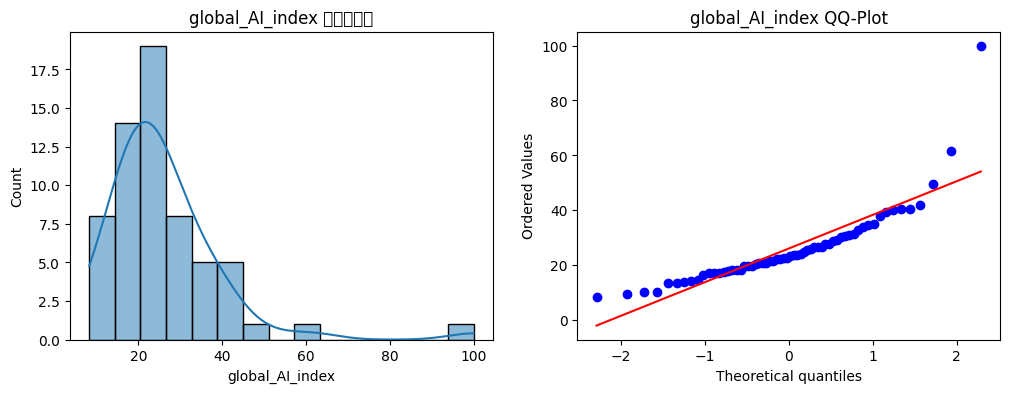

📌 Carbon_Emissions의 정규성 검정 결과
Shapiro-Wilk Test: W=0.3086, p-value=0.0000
Kolmogorov-Smirnov Test: D=0.3747, p-value=0.0000
Anderson-Darling Test: A2=15.1688, Critical Values=[0.544 0.62  0.744 0.868 1.032], Significance Levels=[15.  10.   5.   2.5  1. ]



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47016 (\N{HANGUL SYLLABLE RAEM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


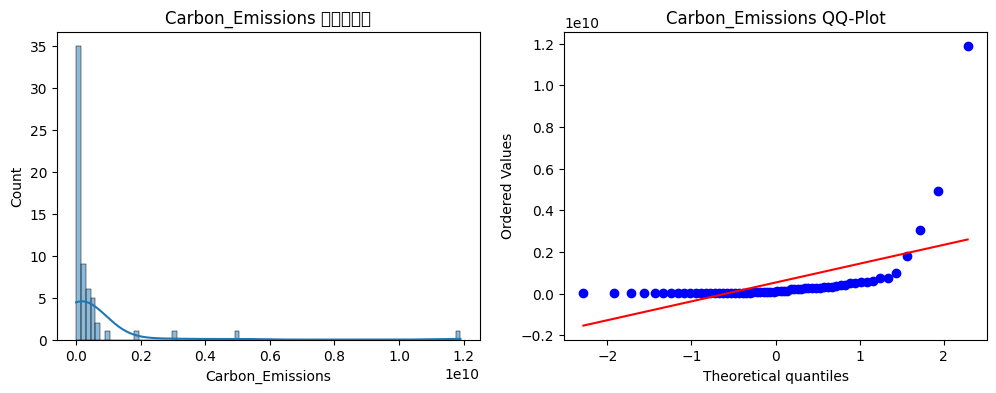

In [ ]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# 예시: AI 인덱스와 탄소 배출량 변수 사용
variables = ["global_AI_index", "Carbon_Emissions"]

for var in variables:
    print(f"📌 {var}의 정규성 검정 결과")

    # 1. Shapiro-Wilk Test (n ≤ 5000일 때 사용)
    stat, p = stats.shapiro(data[var])
    print(f"Shapiro-Wilk Test: W={stat:.4f}, p-value={p:.4f}")

    # 2. Kolmogorov-Smirnov Test (정규성 가정하는 KS-Test)
    stat, p = stats.kstest(data[var], 'norm', args=(data[var].mean(), data[var].std()))
    print(f"Kolmogorov-Smirnov Test: D={stat:.4f}, p-value={p:.4f}")

    # 3. Anderson-Darling Test (가장 엄격한 검정)
    result = stats.anderson(data[var], dist='norm')
    print(f"Anderson-Darling Test: A2={result.statistic:.4f}, Critical Values={result.critical_values}, Significance Levels={result.significance_level}\n")

    # 4. 정규성 시각화 (히스토그램 + QQ-Plot)
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # 히스토그램 (커널 밀도 그래프 포함)
    sns.histplot(data[var], kde=True, ax=axes[0])
    axes[0].set_title(f"{var} 히스토그램")

    # QQ-Plot
    stats.probplot(data[var], dist="norm", plot=axes[1])
    axes[1].set_title(f"{var} QQ-Plot")

    plt.show()

결과 해석 : p-value가 0.05미만이라 정규성을 따르지 않음

4. 군집 분석 진행(계층적 군집 분석)

In [ ]:
#라이브러리 설치
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
# 2. 데이터 표준화 (scale 함수 사용)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = ['global_AI_index', 'Carbon_Emissions']
data_scaled = data[features]
data_scaled = scaler.fit_transform(data_scaled)

In [ ]:
# 3. 거리 행렬 계산 (Manhattan 거리 사용 가능)
from scipy.spatial.distance import pdist, squareform
dist_matrix = squareform(pdist(data_scaled, metric='euclidean'))

In [ ]:
# 4. 계층적 군집 분석 수행 (Ward's method 사용)
from scipy.cluster.hierarchy import linkage, dendrogram
hc = linkage(dist_matrix, method='ward')

<ipython-input-12-6e152639298f>:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  hc = linkage(dist_matrix, method='ward')


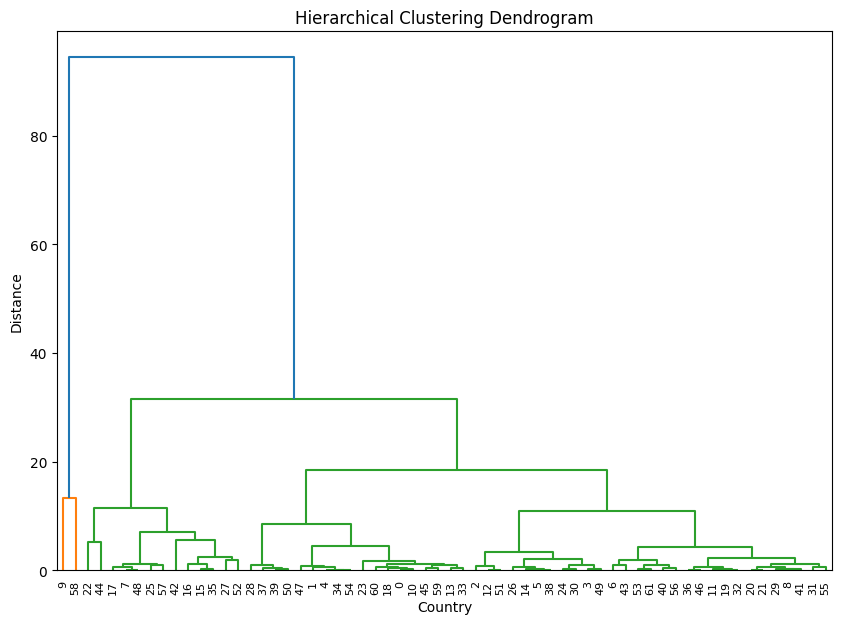

In [ ]:
# 5. 덴드로그램 시각화
plt.figure(figsize=(10, 7))
dendrogram(hc, labels=data.index, leaf_rotation=90, leaf_font_size=8)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Country")
plt.ylabel("Distance")
plt.show()
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(hc, t=3, criterion='maxclust')

In [ ]:
# 6. 군집 개수 결정 후 그룹화
data['Cluster'] = clusters
# 7. 군집별 통계 요약
cluster_means = data.groupby('Cluster')[['global_AI_index', 'Carbon_Emissions']].mean()
print(cluster_means)

         global_AI_index  Carbon_Emissions
Cluster                                   
1              80.750000      8.406947e+09
2              36.938462      6.507148e+08
3              20.621277      1.599986e+08


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

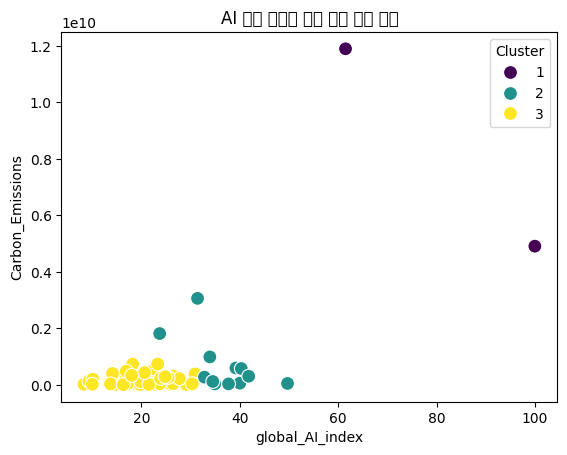

In [ ]:
# 8. 군집별 시각화 (산점도 그래프)
import seaborn as sns
sns.scatterplot(x='global_AI_index', y='Carbon_Emissions', hue='Cluster', data=data, palette='viridis', s=100)
plt.title("AI 발전 수준과 탄소 배출 군집 분석")
plt.show()

In [ ]:
# 군집간 차이가 유의미한지 확인
!pip install pingouin
import pingouin as pg
pg.kruskal(data=data, dv='Carbon_Emissions', between='Cluster')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 6.1 MB/s eta 0:00:00


,Source,ddof1,H,p-unc
Kruskal,Cluster,2,11.926735,0.002571


결과 해석 : p-value가 0.05보다 작으므로 귀무가설 기각
- > 군집 간 탄소 배출량 차이가 유의미

In [ ]:
#사후 검정
import scipy.stats as stats
import pingouin as pg

pwc = pg.pairwise_ttests(data=data, dv='Carbon_Emissions', between='Cluster', parametric=False, padjust='bonferroni')
print(pwc)

  Contrast  A  B  Paired  Parametric  U-val alternative     p-unc    p-corr  \
0  Cluster  1  2   False       False   26.0   two-sided  0.019048  0.057143   
1  Cluster  1  3   False       False   94.0   two-sided  0.001701  0.005102   
2  Cluster  2  3   False       False  449.0   two-sided  0.010291  0.030872   

     p-adjust     hedges  
0  bonferroni   4.529512  
1  bonferroni  10.896754  
2  bonferroni   1.114462  


/usr/local/lib/python3.11/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


5-1. Dunn's test, FDR 방식으로 진행(상단은 bonferroni 보정 사용함)

In [ ]:
!pip install scikit-posthocs
import scikit_posthocs as sp

# Kruskal-Wallis 후 Dunn’s Test 수행 (Bonferroni 보정 포함)
sp.posthoc_dunn(data, val_col="Carbon_Emissions", group_col="Cluster", p_adjust="bonferroni")

,1,2,3
1,1.000000,0.435627,0.026827
2,0.435627,1.000000,0.038057
3,0.026827,0.038057,1.000000


1과 2의 차이 : 유의미하지 않음
2와 3의 차이 : 유의미함
1과 3의 차이 : 유의미함

In [ ]:
import pingouin as pg

# Dunn's test 대신 Benjamini-Hochberg(FDR) 보정 적용
pwc_fdr = pg.pairwise_tests(data=data, dv='Carbon_Emissions', between='Cluster',
                            parametric=False, padjust='fdr_bh')

print(pwc_fdr)

  Contrast  A  B  Paired  Parametric  U-val alternative     p-unc    p-corr  \
0  Cluster  1  2   False       False   26.0   two-sided  0.019048  0.019048   
1  Cluster  1  3   False       False   94.0   two-sided  0.001701  0.005102   
2  Cluster  2  3   False       False  449.0   two-sided  0.010291  0.015436   

  p-adjust     hedges  
0   fdr_bh   4.529512  
1   fdr_bh  10.896754  
2   fdr_bh   1.114462  


결과 해석 : 모두 유의미함

log하고 군집 분석 시행

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

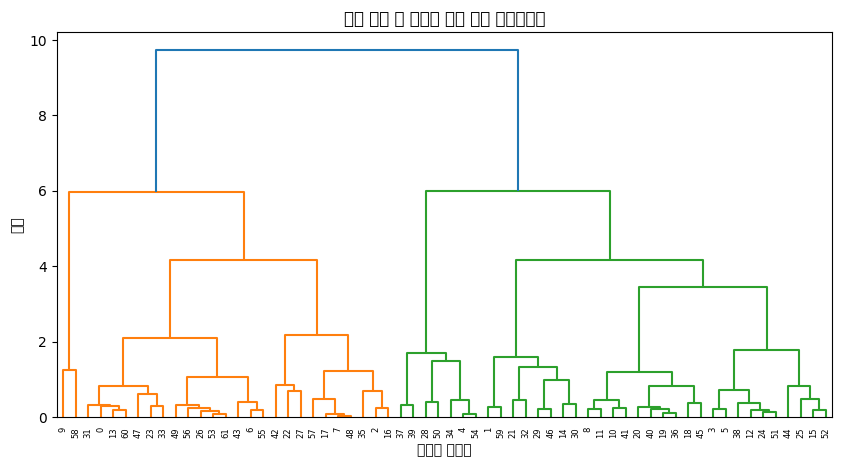

In [ ]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

data["log_AI_index"] = np.log1p(data["global_AI_index"])
data["log_Carbon_Emissions"] = np.log1p(data["Carbon_Emissions"])

# 표준화 (군집 분석은 거리 기반이므로 스케일을 맞춰야 함)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[["log_AI_index", "log_Carbon_Emissions"]])

# 계층적 군집 분석 수행
linked = sch.linkage(scaled_data, method="ward")

# 덴드로그램 시각화
plt.figure(figsize=(10, 5))
sch.dendrogram(linked, labels=data.index, leaf_rotation=90)
plt.title("로그 변환 후 계층적 군집 분석 덴드로그램")
plt.xlabel("데이터 인덱스")
plt.ylabel("거리")
plt.show()

<Axes: xlabel='log_AI_index', ylabel='log_Carbon_Emissions'>

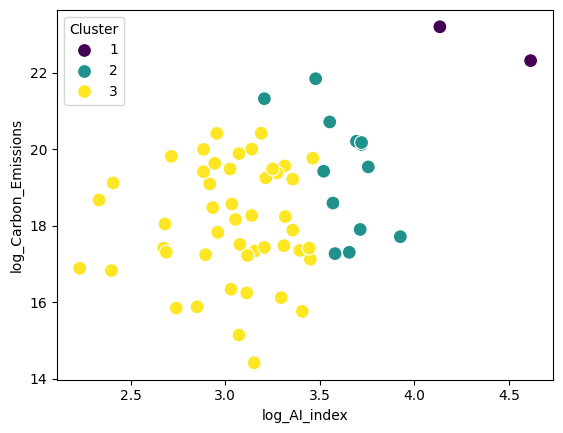

In [ ]:
# 군집별 시각화(산점도 그래프)

sns.scatterplot(x='log_AI_index', y='log_Carbon_Emissions', hue='Cluster', data=data, palette='viridis', s=100) # Changed 'log_Carbon_Emissionss' to 'log_Carbon_Emissions'

In [ ]:
!pip install pingouin
import pingouin as pg
pg.kruskal(data=data, dv='log_Carbon_Emissions', between='Cluster')



,Source,ddof1,H,p-unc
Kruskal,Cluster,2,44.842257,1.830744e-10


결과 해석 : p-value가 0.05보다 작으므로 귀무가설 기각
> 군집간 탄소배출량 차이가 유의미

In [ ]:
import scipy.stats as stats
import pingouin as pg

pwc = pg.pairwise_ttests(data=data, dv='log_Carbon_Emissions', between='Cluster', parametric=False, padjust='bonferroni')
print(pwc)

  Contrast  A  B  Paired  Parametric  U-val alternative         p-unc  \
0  Cluster  0  1   False       False  756.0   two-sided  2.076915e-10   
1  Cluster  0  2   False       False  186.0   two-sided  2.602416e-06   
2  Cluster  1  2   False       False   73.0   two-sided  3.198807e-01   

         p-corr    p-adjust    hedges  
0  6.230745e-10  bonferroni  2.822824  
1  7.807249e-06  bonferroni  2.260364  
2  9.596420e-01  bonferroni -0.608790  


/usr/local/lib/python3.11/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


In [ ]:
import scipy.stats as stats
import pingouin as pg

pwc = pg.pairwise_ttests(data=data, dv='log_Carbon_Emissions', between='Cluster', parametric=False, padjust='bonferroni')
print(pwc)

  Contrast  A  B  Paired  Parametric  U-val alternative         p-unc  \
0  Cluster  0  1   False       False  756.0   two-sided  2.076915e-10   
1  Cluster  0  2   False       False  186.0   two-sided  2.602416e-06   
2  Cluster  1  2   False       False   73.0   two-sided  3.198807e-01   

         p-corr    p-adjust    hedges  
0  6.230745e-10  bonferroni  2.822824  
1  7.807249e-06  bonferroni  2.260364  
2  9.596420e-01  bonferroni -0.608790  


/usr/local/lib/python3.11/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

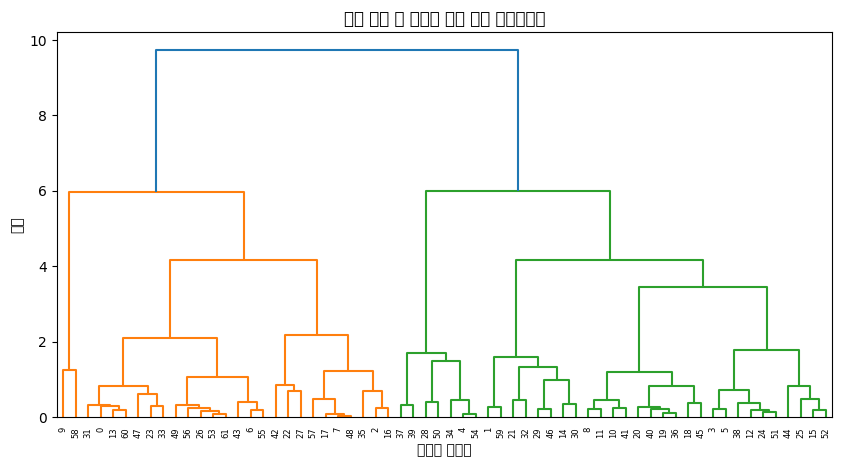

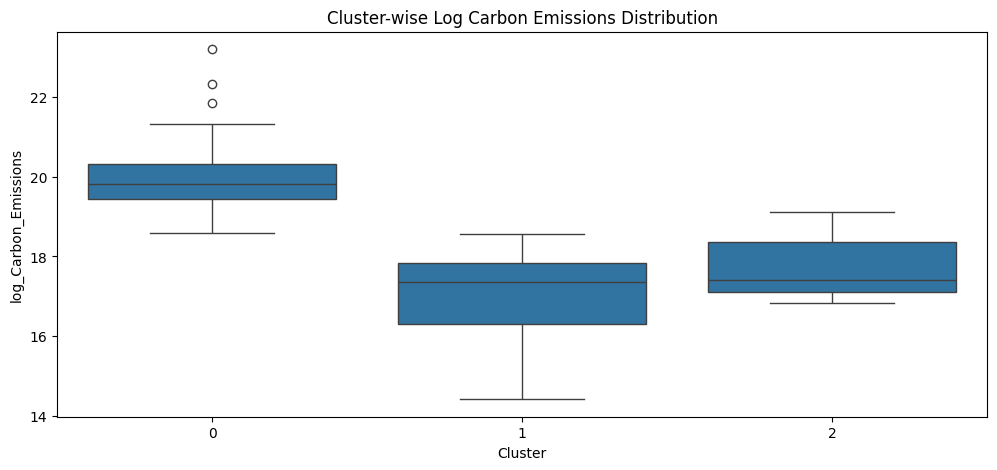

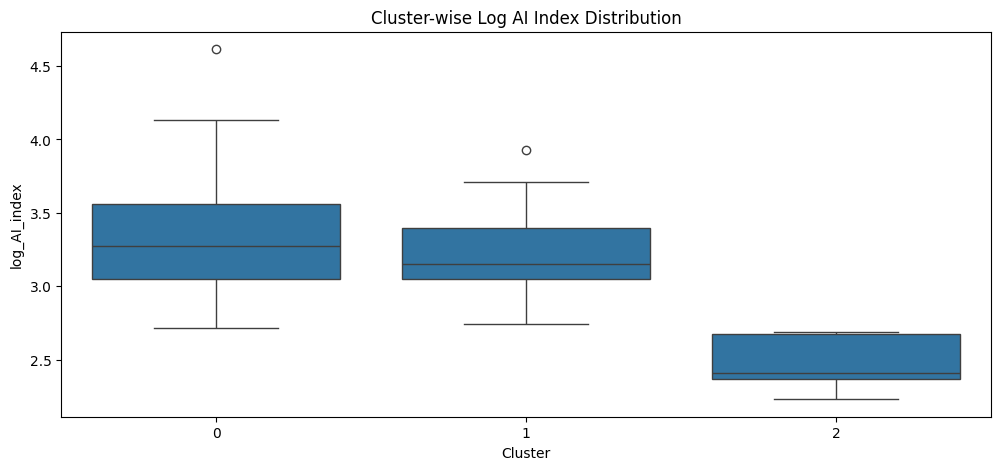

ANOVA 결과 (Carbon Emissions)
                sum_sq    df          F        PR(>F)
C(Cluster)  124.613664   2.0  59.939197  6.161362e-15
Residual     61.330537  59.0        NaN           NaN

ANOVA 결과 (AI Index)
              sum_sq    df          F        PR(>F)
C(Cluster)  4.224104   2.0  18.165746  7.122967e-07
Residual    6.859673  59.0        NaN           NaN

Tukey HSD Test for Log Carbon Emissions
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -2.9596    0.0 -3.6207 -2.2984   True
     0      2  -2.3308    0.0 -3.3704 -1.2911   True
     1      2   0.6288 0.3177 -0.4071  1.6647  False
----------------------------------------------------

Tukey HSD Test for Log AI Index
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.1262 0.3616

In [ ]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Log transformation
data["log_AI_index"] = np.log1p(data["global_AI_index"])
data["log_Carbon_Emissions"] = np.log1p(data["Carbon_Emissions"])

# Standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[["log_AI_index", "log_Carbon_Emissions"]])

# Hierarchical clustering
linked = sch.linkage(scaled_data, method="ward")

# Dendrogram visualization
plt.figure(figsize=(10, 5))
sch.dendrogram(linked, labels=data.index, leaf_rotation=90)
plt.title("로그 변환 후 계층적 군집 분석 덴드로그램")
plt.xlabel("데이터 인덱스")
plt.ylabel("거리")
plt.show()

# 1️⃣ Add hierarchical clustering results to the data
n_clusters = 3  # Number of clusters chosen from the dendrogram
hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
data['Cluster'] = hc.fit_predict(scaled_data)

# 2️⃣ Visualize cluster-wise data distribution (box plot)
plt.figure(figsize=(12, 5))
sns.boxplot(x=data['Cluster'], y=data['log_Carbon_Emissions']) # This line previously caused the error
plt.title('Cluster-wise Log Carbon Emissions Distribution')
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x=data['Cluster'], y=data['log_AI_index'])
plt.title('Cluster-wise Log AI Index Distribution')
plt.show()

# 3️⃣ Perform ANOVA test
anova_model = ols('log_Carbon_Emissions ~ C(Cluster)', data=data).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print("ANOVA 결과 (Carbon Emissions)")
print(anova_table)

anova_model2 = ols('log_AI_index ~ C(Cluster)', data=data).fit()
anova_table2 = sm.stats.anova_lm(anova_model2, typ=2)
print("\nANOVA 결과 (AI Index)")
print(anova_table2)

# 4️⃣ Post-hoc test (Tukey's HSD)
tukey = pairwise_tukeyhsd(data["log_Carbon_Emissions"], data["Cluster"])
print("\nTukey HSD Test for Log Carbon Emissions")
print(tukey)

tukey2 = pairwise_tukeyhsd(data["log_AI_index"], data["Cluster"])
print("\nTukey HSD Test for Log AI Index")
print(tukey2)

나누고 군집 분석 시행

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lo

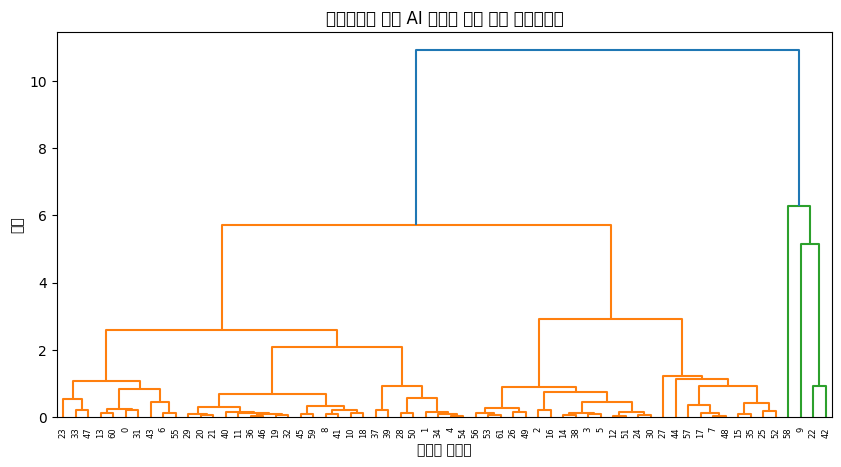

In [ ]:
data["Carbon_per_AI"] = data["Carbon_Emissions"] / data["global_AI_index"]

# 표준화
scaled_data = scaler.fit_transform(data[["global_AI_index", "Carbon_per_AI"]])

# 계층적 군집 분석 수행
linked = sch.linkage(scaled_data, method="ward")

# 덴드로그램 시각화
plt.figure(figsize=(10, 5))
sch.dendrogram(linked, labels=data.index, leaf_rotation=90)
plt.title("탄소배출량 대비 AI 인덱스 군집 분석 덴드로그램")
plt.xlabel("데이터 인덱스")
plt.ylabel("거리")
plt.show()

<Axes: xlabel='global_AI_index', ylabel='Carbon_per_AI'>

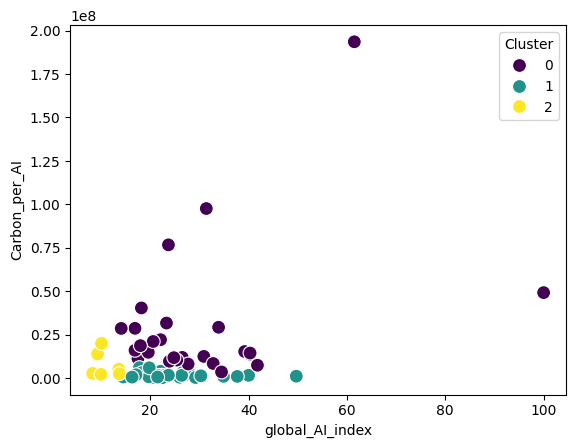

In [ ]:
# 군집별 시각화(산점도 그래프) global_AI_index", "Carbon_per_AI

sns.scatterplot(x='global_AI_index', y='Carbon_per_AI', hue='Cluster', data=data, palette='viridis', s=100) # Corrected the column name for 'x' to 'global_AI_index'

In [ ]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import statsmodels.formula.api as smf # Updated import
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ... (rest of your code)

# ANOVA 검정 수행
# Changed sm.ols to smf.ols (smf for statsmodels.formula.api)
model = smf.ols('Carbon_per_AI ~ C(Cluster)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2) # This needs to be adjusted
print(anova_table)

# 사후 검정 (Tukey HSD) 수행
posthoc = pg.pairwise_tukey(data=data, dv='Carbon_per_AI', between='Cluster')
print(posthoc)
# ... (rest of your code)

                  sum_sq    df        F   PR(>F)
C(Cluster)  1.129056e+16   2.0  8.31226  0.00066
Residual    4.006989e+16  59.0      NaN      NaN
   A  B       mean(A)       mean(B)          diff            se         T  \
0  0  1  2.978946e+07  1.714623e+06  2.807484e+07  7.029162e+06  3.994052   
1  0  2  2.978946e+07  6.923390e+06  2.286607e+07  1.105329e+07  2.068712   
2  1  2  1.714623e+06  6.923390e+06 -5.208768e+06  1.101258e+07 -0.472983   

    p-tukey    hedges  
0  0.000529  1.010315  
1  0.105197  0.631438  
2  0.884243 -1.529897  


중국 미국 빼고 군집분석 진행

In [ ]:
import pandas as pd

# "Entity" 열에서 "China"와 "United States"를 포함하는 행 제거
data_NON = data[~data['Entity'].isin(['China', 'United States'])]

# 결과 출력
print(data_NON)


                  Entity  Carbon_Emissions  global_AI_index  Cluster  \
0              Argentina         195805970             17.5        0   
1                Armenia           7608323             14.5        1   
2              Australia         382972000             30.9        0   
3                Austria          58578050             27.7        1   
4                Bahrain          36526764             13.5        2   
5                Belgium          83368480             26.6        1   
6                 Brazil         486470080             22.1        0   
7                 Canada         549299000             40.3        0   
8                  Chile          77287704             20.2        1   
10              Colombia         105238664             17.8        1   
11               Czechia          85624184             22.1        1   
12               Denmark          27264778             30.5        1   
13                 Egypt         269006200             16.9     

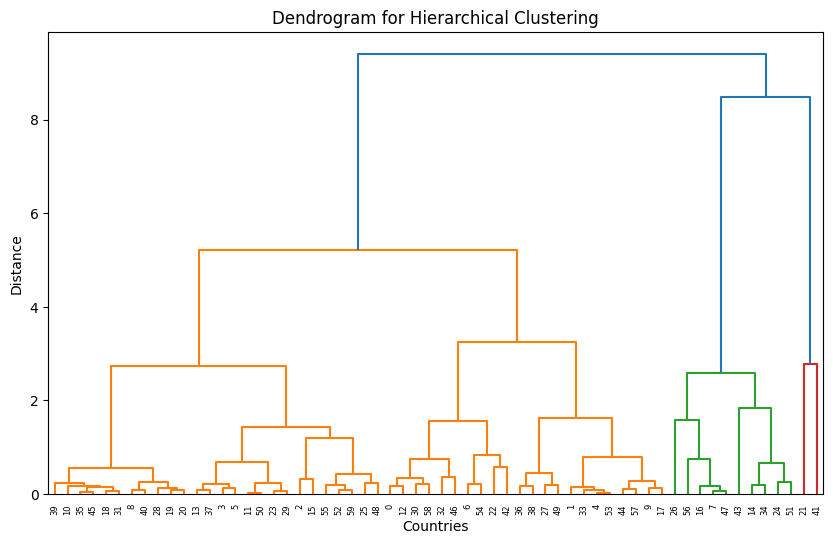

<ipython-input-27-40ace053451e>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_NON['Cluster'] = hc.fit_predict(X_scaled)


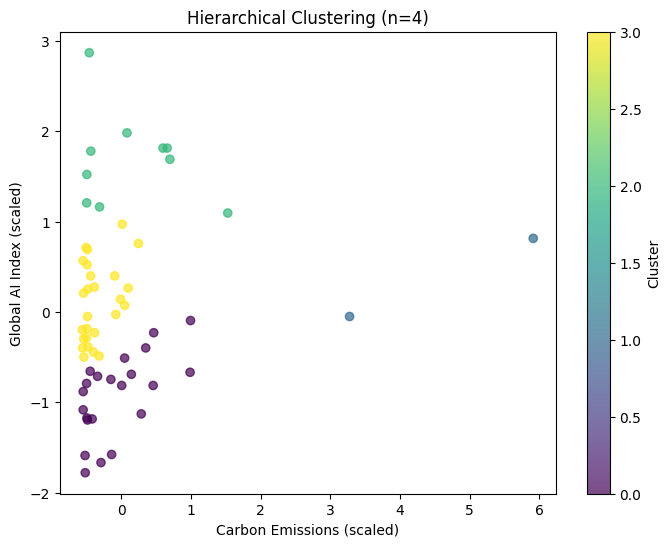

Cluster
3    26
0    22
2    10
1     2
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# 1️⃣ 데이터 전처리 (스케일링)
X = data_NON[['Carbon_Emissions', 'global_AI_index']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2️⃣ 덴드로그램(Dendrogram) 생성
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.xlabel('Countries')
plt.ylabel('Distance')
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

# 3️⃣ 최적의 클러스터 개수 선택 후 계층적 군집 분석 실행
n_clusters = 4  # 덴드로그램을 보고 적절한 군집 개수 선택
# affinity argument removed for 'ward' linkage
hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
data_NON['Cluster'] = hc.fit_predict(X_scaled)

# 4️⃣ 클러스터링 결과 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data_NON['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Carbon Emissions (scaled)')
plt.ylabel('Global AI Index (scaled)')
plt.title(f'Hierarchical Clustering (n={n_clusters})')
plt.colorbar(label='Cluster')
plt.show()

# 5️⃣ 각 클러스터별 데이터 개수 출력
print(data_NON['Cluster'].value_counts())